In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import autocorrelation_plot as auto_corr
import math
from datetime import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split,cross_val_score
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,balanced_accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics,preprocessing
from sklearn.linear_model import LinearRegression


In [4]:
df_store = pd.read_csv(r"C:\Users\ASUS\Documents\SAGAR\demand forecasting for invetory managment project\stores.csv")

In [5]:
df_train = pd.read_csv(r"C:\Users\ASUS\Documents\SAGAR\demand forecasting for invetory managment project\train.csv")

In [6]:
df_features = pd.read_csv(r"C:\Users\ASUS\Documents\SAGAR\demand forecasting for invetory managment project\features.csv")

In [7]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
df = df_train.merge(df_features ,on=['Store','Date'], how = 'inner').merge(df_store,on=['Store'],how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [11]:
df_train.isnull().sum().reset_index()

,index,0
0,Store,0
1,Dept,0
2,Date,0
3,Weekly_Sales,0
4,IsHoliday,0


In [12]:
df_store.isnull().sum().reset_index()

,index,0
0,Store,0
1,Type,0
2,Size,0


In [13]:
df_features.isnull().sum().reset_index()

,index,0
0,Store,0
1,Date,0
2,Temperature,0
3,Fuel_Price,0
4,MarkDown1,4158
5,MarkDown2,5269
6,MarkDown3,4577
7,MarkDown4,4726
8,MarkDown5,4140
9,CPI,585


In [14]:
df.shape

(421570, 17)

In [15]:
df['Store'].nunique()

45

In [16]:
df['Dept'].nunique()

81

In [19]:
store_dept_table = pd.pivot_table(df,index='Store',columns='Dept',values='Weekly_Sales',aggfunc=np.mean).reset_index()
print(store_dept_table)

Dept  Store             1              2             3             4  \
0         1  22513.322937   46102.090420  13150.478042  36964.154476   
1         2  30777.980769   65912.922517  17476.563357  45607.666573   
2         3   7328.621049   16841.775664   5509.300769   8434.186503   
3         4  36979.940070   93639.315385  19012.491678  56603.400140   
4         5   9774.553077   12317.953287   4101.085175   9860.806783   
5         6  23867.553776   50269.437273  16806.638811  34187.366503   
6         7   9542.801259   22603.690769   8633.536923  14950.518601   
7         8  14789.827343   35729.821748  10683.305105  21089.309301   
8         9  11846.558252   24969.477413   7497.356783  17165.947762   
9        10  39925.138951  109795.291469  32086.181469  48579.826364   
10       11  18860.911958   57114.326224  17628.778671  28837.744545   
11       12  17330.087622   74494.846224  17535.251678  26673.788182   
12       13  47020.455455   76339.960000  26116.623706  42563.27

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13840\3782470193.py:1: FutureWarning: The provided callable <function mean at 0x000001F32AB340E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df,index='Store',columns='Dept',values='Weekly_Sales',aggfunc=np.mean).reset_index()


In [23]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,False,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,False,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,True,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,False,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,False,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,False,B,118221


In [26]:
df = df.loc[df['Weekly_Sales']>0]

In [32]:
df.shape

(420212, 17)

In [36]:
df['Date'].head().reset_index()

,index,Date
0,0,2010-02-05
1,1,2010-02-12
2,2,2010-02-19
3,3,2010-02-26
4,4,2010-03-05


In [37]:
df['Date'].tail().reset_index()

,index,Date
0,421565,2012-09-28
1,421566,2012-10-05
2,421567,2012-10-12
3,421568,2012-10-19
4,421569,2012-10-26


<Axes: xlabel='IsHoliday_x', ylabel='Weekly_Sales'>

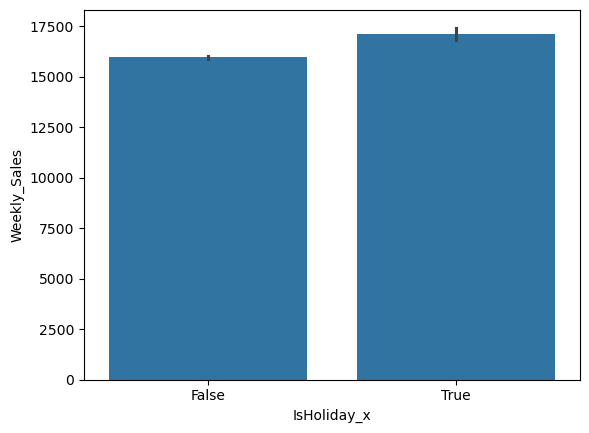

In [38]:
sns.barplot(x='IsHoliday_x',y='Weekly_Sales',data=df)

In [39]:
df_holiday = df.loc[df['IsHoliday_x']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [41]:
df_holiday = df.loc[df['IsHoliday_x']==False]
df_holiday['Date'].unique()

array(['2010-02-05', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02',
       '2010-04-09', '2010-04-16', '2010-04-23', '2010-04-30',
       '2010-05-07', '2010-05-14', '2010-05-21', '2010-05-28',
       '2010-06-04', '2010-06-11', '2010-06-18', '2010-06-25',
       '2010-07-02', '2010-07-09', '2010-07-16', '2010-07-23',
       '2010-07-30', '2010-08-06', '2010-08-13', '2010-08-20',
       '2010-08-27', '2010-09-03', '2010-09-17', '2010-09-24',
       '2010-10-01', '2010-10-08', '2010-10-15', '2010-10-22',
       '2010-10-29', '2010-11-05', '2010-11-12', '2010-11-19',
       '2010-12-03', '2010-12-10', '2010-12-17', '2010-12-24',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-18', '2011-02-25', '2011-03-04',
       '2011-03-11', '2011-03-18', '2011-03-25', '2011-04-01',
       '2011-04-08', '2011-04-15', '2011-04-22', '2011-04-29',
       '2011-05-06', '2011-05-13', '2011-05-20', '2011-

In [43]:
df.loc[(df['Date']=='2010-02-1')|(df['Date']=='2012-02-11')|(df['Date']=='2012-02-10'),'Super_Bowl']=True

In [44]:
df.loc[(df['Date']!='2010-02-1')&(df['Date']!='2012-02-11')&(df['Date']!='2012-02-10'),'Super_Bowl']=False

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

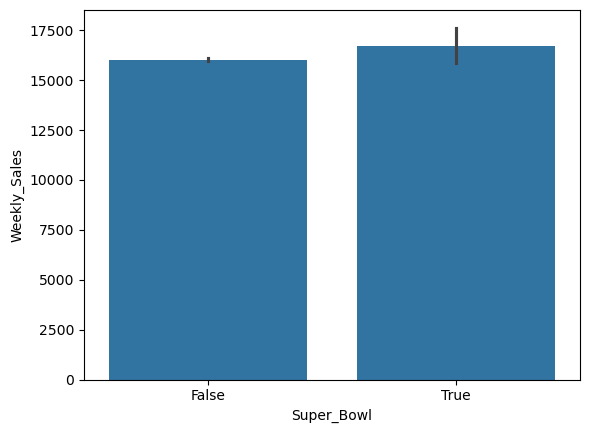

In [71]:
sns.barplot(x='Super_Bowl',y='Weekly_Sales',data=df)

In [47]:
df.loc[(df['Date']=='2010-09-1')|(df['Date']=='2012-09-09')|(df['Date']=='2012-09-07'),'Labour_Day']=True

In [50]:
df.loc[(df['Date']!='2010-09-1')&(df['Date']!='2012-09-09')&(df['Date']!='2012-09-07'),'Labour_Day']=False

<Axes: xlabel='Labour_Day', ylabel='Weekly_Sales'>

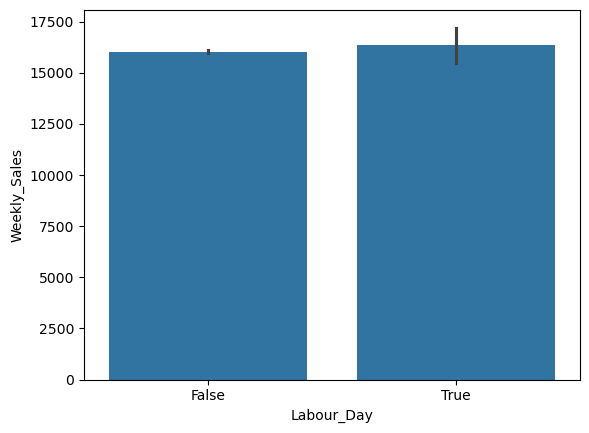

In [51]:
sns.barplot(x='Labour_Day',y='Weekly_Sales',data=df)

In [52]:
df.loc[(df['Date']=='2010-12-31')|(df['Date']=='2012-12-30'),'Christmas']=True

In [53]:
df.loc[(df['Date']!='2010-12-31')&(df['Date']!='2012-12-30'),'Christmas']=False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

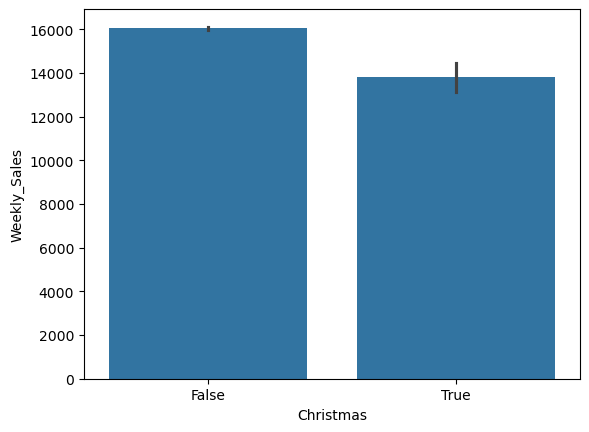

In [54]:
sns.barplot(x='Christmas',y='Weekly_Sales',data=df)

In [77]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean().reset_index()

,Christmas,Type,Weekly_Sales
0,False,A,20168.110685
1,False,B,12302.001757
2,False,C,9558.740426
3,True,A,17305.419281
4,True,B,10656.536911
5,True,C,8194.271073


In [78]:
df.groupby(['Labour_Day','Type'])['Weekly_Sales'].mean().reset_index()

,Labour_Day,Type,Weekly_Sales
0,False,A,20144.565536
1,False,B,12290.123882
2,False,C,9546.158081
3,True,A,20648.887583
4,True,B,12350.871219
5,True,C,10002.070326


In [79]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean().reset_index()

,Super_Bowl,Type,Weekly_Sales
0,False,A,20141.774002
1,False,B,12287.638792
2,False,C,9545.660797
3,True,A,21027.653865
4,True,B,12700.349922
5,True,C,10066.960841


(-1.0999996009944335,
 1.099999980999735,
 -1.099997895997883,
 1.0999997646557702)

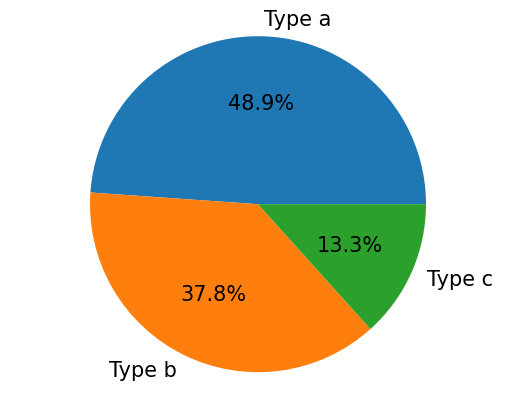

In [58]:
my_data=[48.88,37.77,13.33]
my_labels='Type a','Type b','Type c'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',textprops={'fontsize':15})
plt.axis('equal')

In [59]:
df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()

,IsHoliday_x,Weekly_Sales
0,False,15952.816352
1,True,17094.300918


In [60]:
df.sort_values(by='Weekly_Sales',ascending=False).head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Super_Bowl,Labour_Day,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,True,B,126512,False,False,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,True,B,103681,False,False,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,True,B,126512,False,False,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,True,B,103681,False,False,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,True,A,200898,False,False,False


In [61]:
df_store.groupby('Type').describe()['Size'].round(2).reset_index()

,Type,count,mean,std,min,25%,50%,75%,max
0,A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
1,B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
2,C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


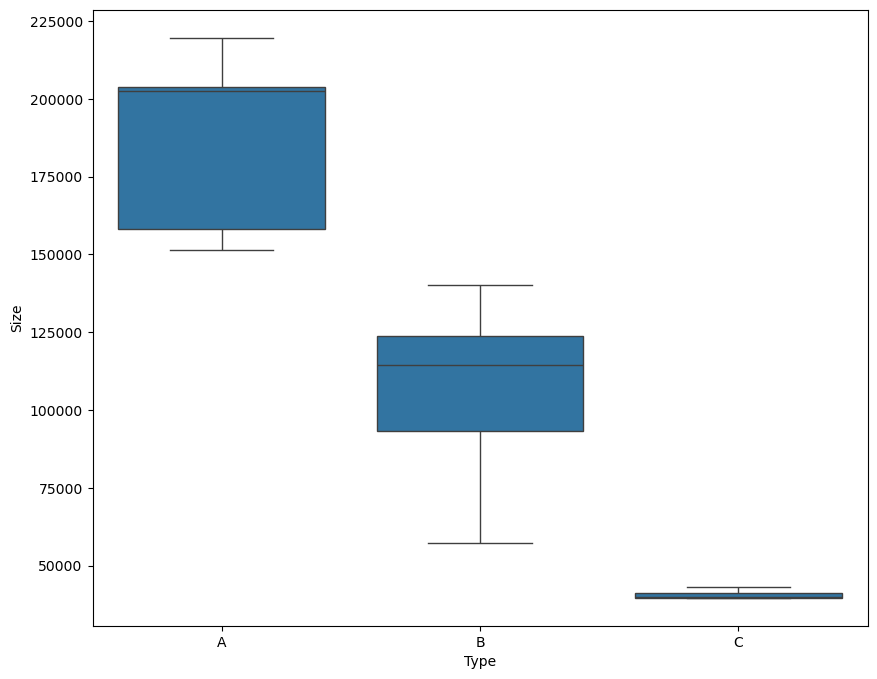

In [62]:
plt.figure(figsize=(10,8))
fig=sns.boxplot(x='Type',y='Size',data=df,showfliers=False)

In [63]:
df.isna().sum().reset_index()

,index,0
0,Store,0
1,Dept,0
2,Date,0
3,Weekly_Sales,0
4,IsHoliday_x,0
5,Temperature,0
6,Fuel_Price,0
7,MarkDown1,270031
8,MarkDown2,309308
9,MarkDown3,283561


In [64]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,150181.000000,110904.000000,136651.000000,134518.000000,150929.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,7247.821269,3330.146158,1441.736203,3384.782267,4629.531870,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,8293.028741,9460.395025,9631.968459,6295.136952,5960.171711,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,2240.270000,41.600000,5.100000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


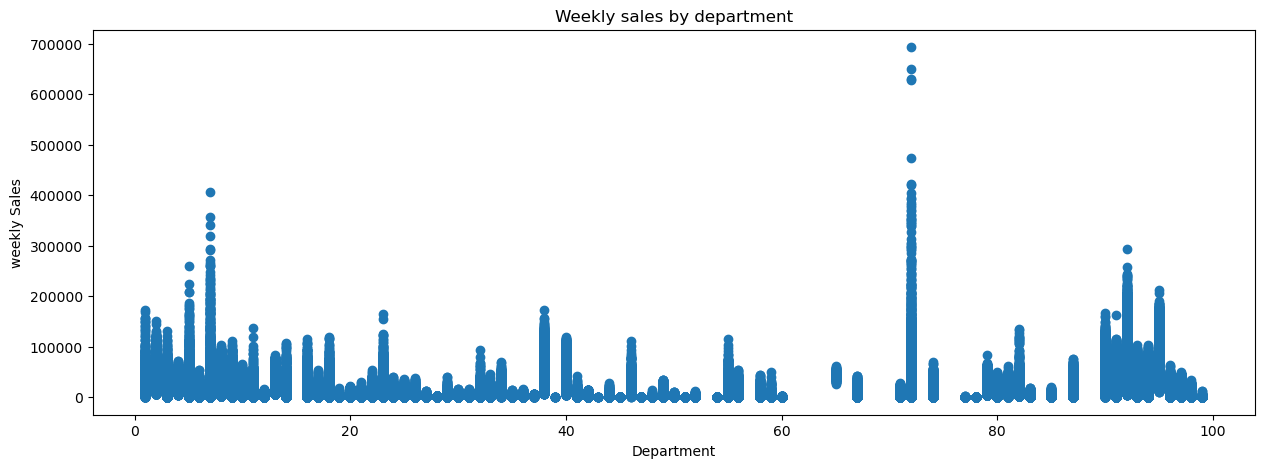

In [65]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly sales by department')
plt.xlabel('Department')
plt.ylabel('weekly Sales')
plt.scatter(x,y)
plt.show()

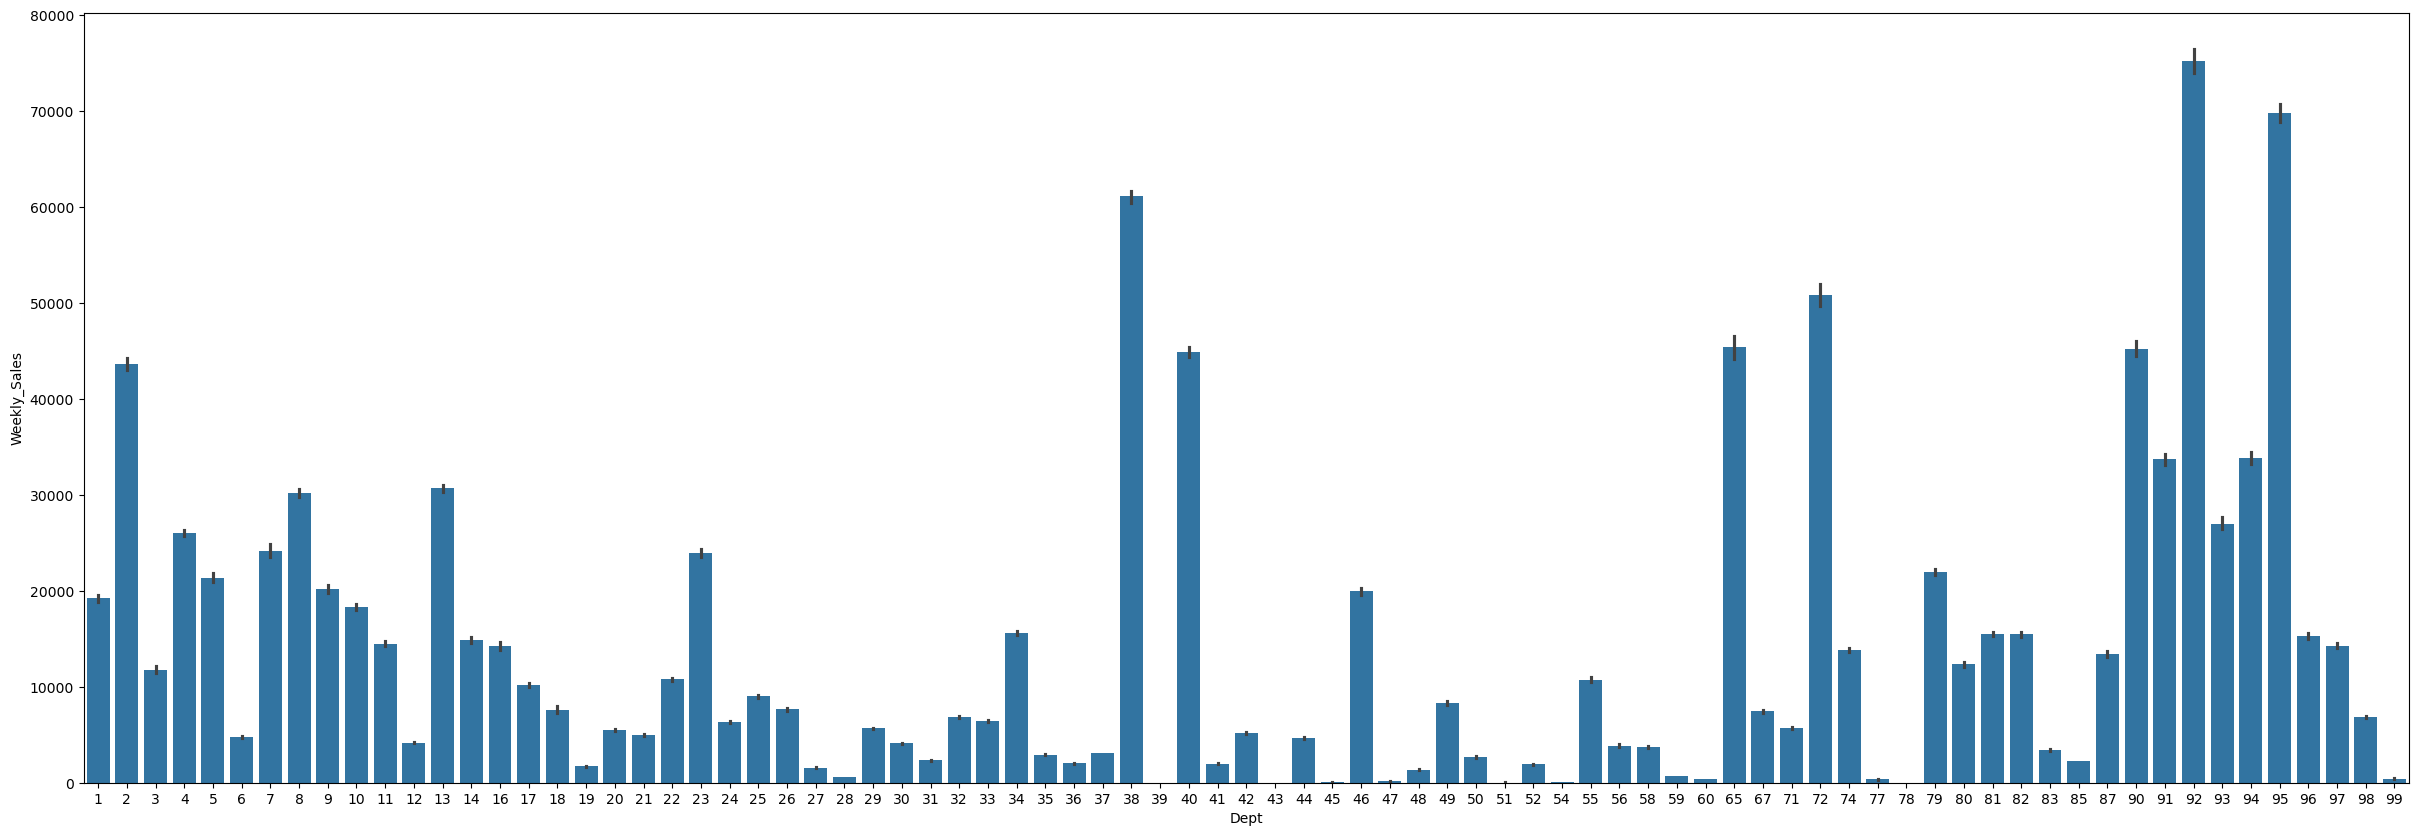

In [93]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept',y='Weekly_Sales',data=df)

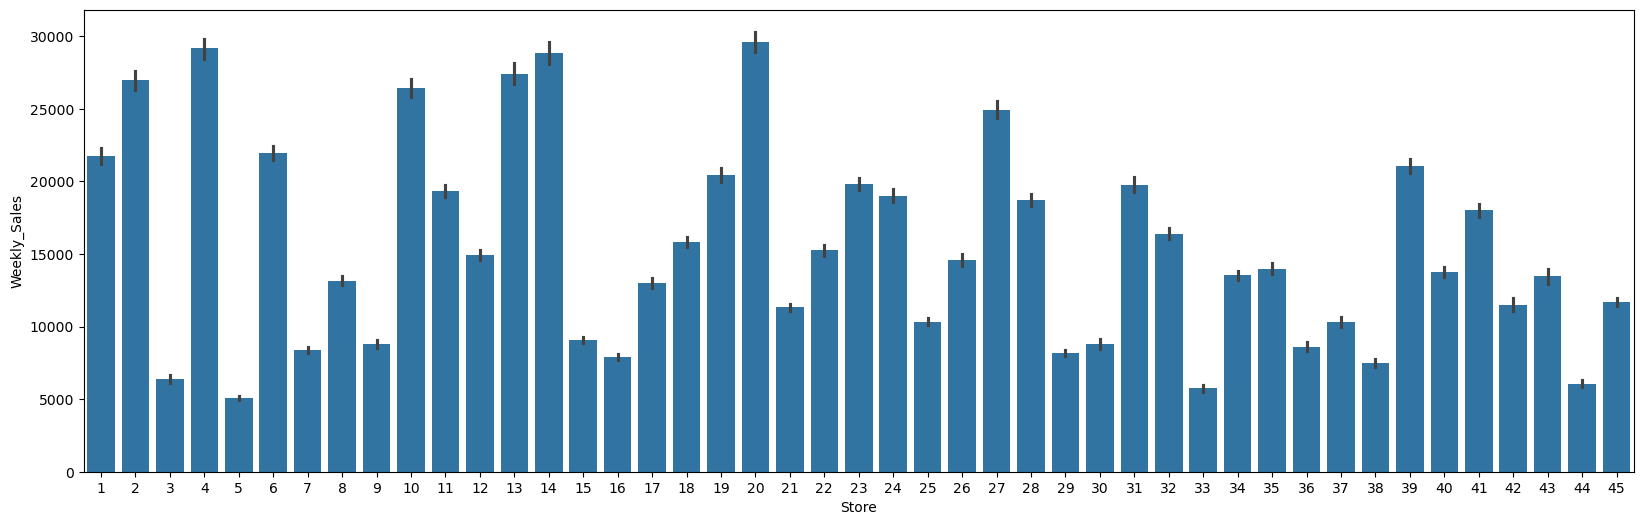

In [97]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store',y='Weekly_Sales',data=df)

<Axes: xlabel='Fuel_Price'>

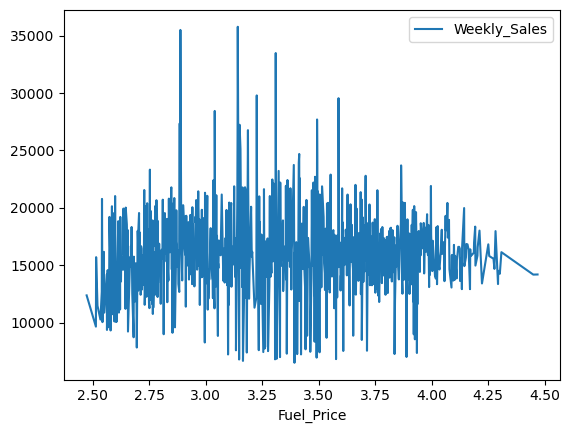

In [109]:
fuel_price = pd.pivot_table(df,values='Weekly_Sales',index='Fuel_Price')
fuel_price.plot()

<Axes: xlabel='Temperature'>

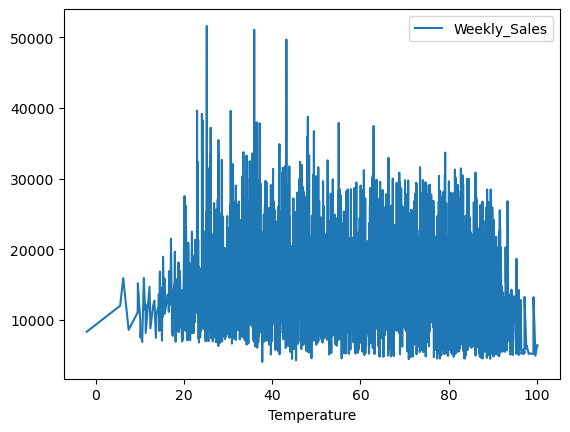

In [111]:
temp = pd.pivot_table(df,values='Weekly_Sales',index='Temperature')
temp.plot()

<Axes: xlabel='Fuel_Price'>

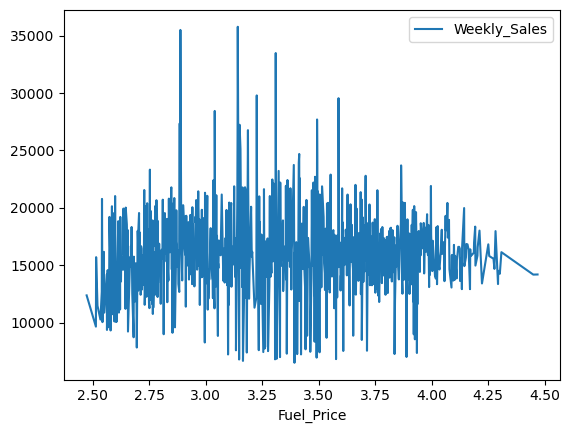

In [113]:
CPI = pd.pivot_table(df,values='Weekly_Sales',index='Fuel_Price')
CPI.plot()

<Axes: xlabel='CPI'>

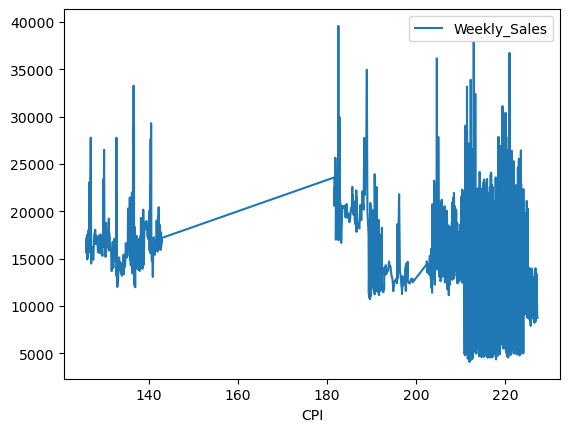

In [115]:
CPI = pd.pivot_table(df,values='Weekly_Sales',index='CPI')
CPI.plot()

<Axes: xlabel='Unemployment'>

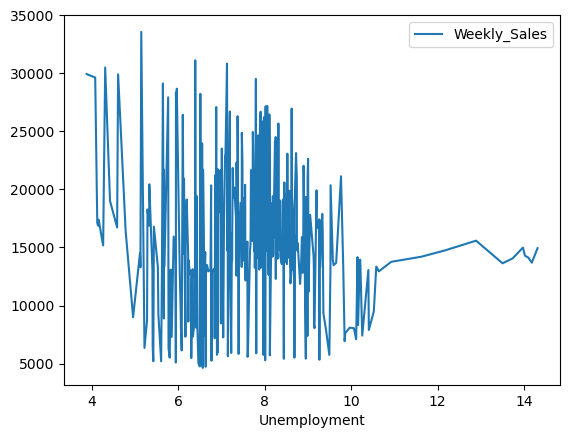

In [117]:
UNEMPLOYMENT = pd.pivot_table(df,values='Weekly_Sales',index='Unemployment')
UNEMPLOYMENT.plot()

In [119]:
df.to_csv('clean_data.csv')

In [122]:
df = pd.read_csv('./clean_data.csv')

In [124]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [126]:
df_encoded = df.copy()

In [128]:
type_group = {'A':1,'B':2,'C':3}
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13840\610445081.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Type'] = df_encoded['Type'].replace(type_group)


In [132]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int)

In [134]:
df_encoded['Labour_Day'] = df_encoded['Super_Bowl'].astype(bool).astype(int)

In [136]:
df_encoded['Christmas'] = df_encoded['Super_Bowl'].astype(bool).astype(int)

In [138]:
df_new = df_encoded.copy()

In [140]:
drop_col = ['Super_Bowl','Labour_Day','Christmas']
df_new.drop(drop_col,axis=1,inplace=True)

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr())
plt.show()

In [154]:
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
train_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

print(df_encoded.columns)

target ='Weekly_Sales'
used_cols1=[c for c in df_encoded.columns.to_list() if c not in [target]]

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
Y_train_enc = train_data_enc[target]
Y_test_enc = test_data_enc[target]

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'Super_Bowl', 'Labour_Day', 'Christmas'],
      dtype='object')


NameError: name 'test_data_enc' is not defined

In [170]:
X_enc = df_encoded[used_cols1]

In [172]:
print('2450.10123789856436')

2450.10123789856436
